# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings("ignore")

renda = pd.read_csv('previsao_de_renda.csv')
renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

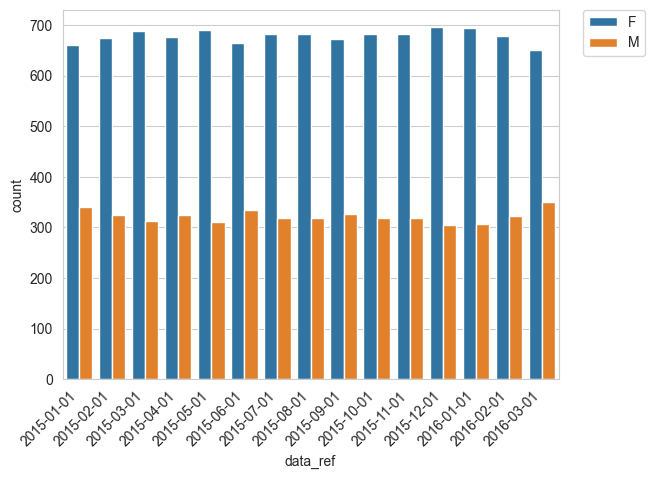

In [8]:
ax = sns.countplot(x='data_ref',  hue = 'sexo', data=renda)


ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
plt.xticks(rotation=45, ha="right")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [12]:
tab = pd.crosstab(renda['data_ref'],renda['sexo'])
tab.div(tab.sum(axis = 1), axis = 0)

sexo,F,M
data_ref,,
2015-01-01,0.660,0.340
2015-02-01,0.675,0.325
2015-03-01,0.687,0.313
2015-04-01,0.676,0.324
2015-05-01,0.689,0.311
2015-06-01,0.665,0.335
2015-07-01,0.681,0.319
2015-08-01,0.681,0.319
2015-09-01,0.673,0.327


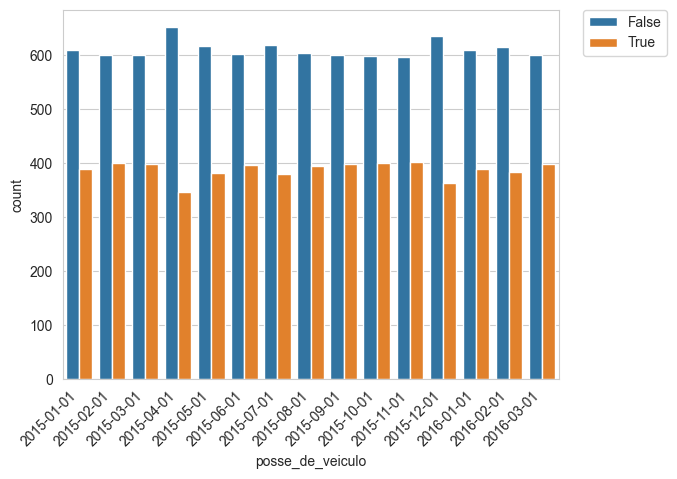

In [10]:
ax = sns.countplot(x='data_ref',  hue = 'posse_de_veiculo', data=renda)


ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
plt.xticks(rotation=45, ha="right")
plt.xlabel("posse_de_veiculo")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [13]:
tab = pd.crosstab(renda['data_ref'],renda['posse_de_veiculo'])
tab.div(tab.sum(axis = 1), axis = 0)

posse_de_veiculo,False,True
data_ref,,
2015-01-01,0.611,0.389
2015-02-01,0.600,0.400
2015-03-01,0.601,0.399
2015-04-01,0.652,0.348
2015-05-01,0.617,0.383
2015-06-01,0.602,0.398
2015-07-01,0.619,0.381
2015-08-01,0.604,0.396
2015-09-01,0.601,0.399


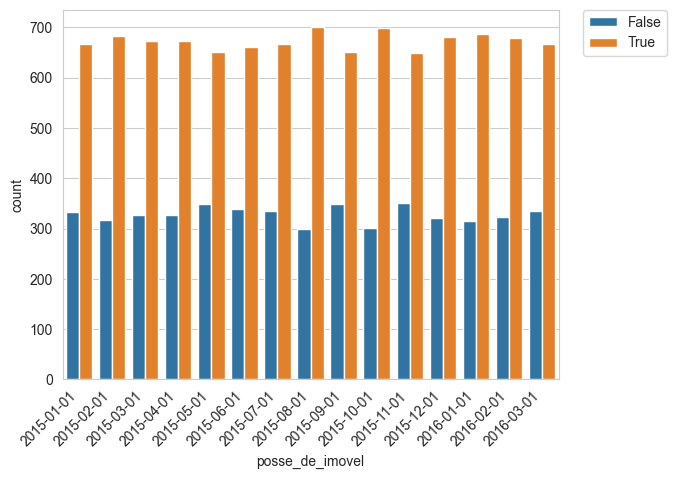

In [11]:
ax = sns.countplot(x='data_ref',  hue = 'posse_de_imovel', data=renda)


ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
plt.xticks(rotation=45, ha="right")
plt.xlabel("posse_de_imovel")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [14]:
tab = pd.crosstab(renda['data_ref'],renda['posse_de_imovel'])
tab.div(tab.sum(axis = 1), axis = 0)

posse_de_imovel,False,True
data_ref,,
2015-01-01,0.333,0.667
2015-02-01,0.317,0.683
2015-03-01,0.327,0.673
2015-04-01,0.327,0.673
2015-05-01,0.349,0.651
2015-06-01,0.339,0.661
2015-07-01,0.334,0.666
2015-08-01,0.300,0.700
2015-09-01,0.349,0.651


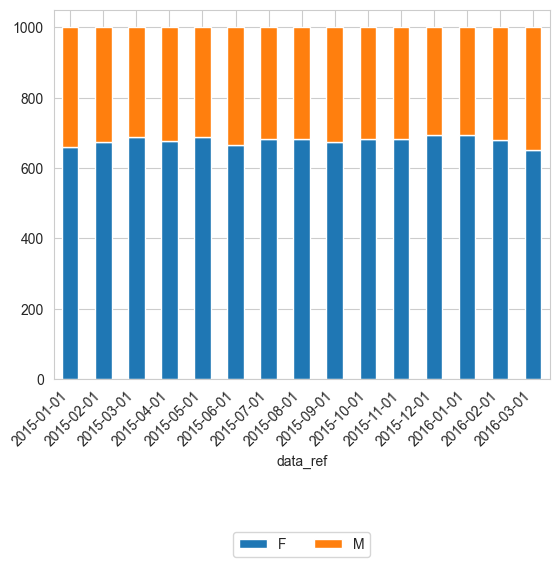

In [20]:
tab_freq = pd.crosstab(renda['data_ref'],renda['sexo'])
tab = tab_freq.div(tab.sum(axis = 1), axis = 0)

ax = tab.plot.bar(stacked = True)

plt.xticks(rotation=45, ha="right")
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

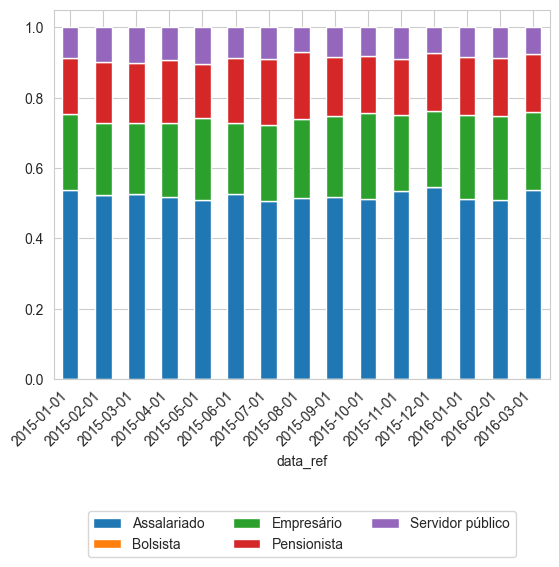

In [21]:
tab_freq = pd.crosstab(renda['data_ref'],renda['tipo_renda'])
tab = tab_freq.div(tab.sum(axis = 1), axis = 0)

ax = tab.plot.bar(stacked = True)

plt.xticks(rotation=45, ha="right")
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

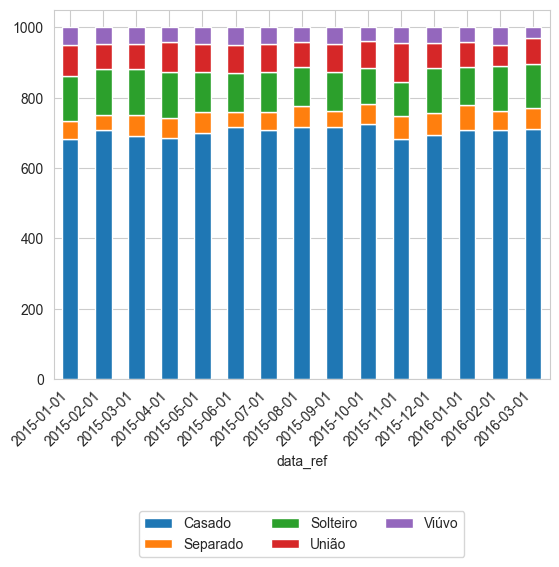

In [22]:
tab_freq = pd.crosstab(renda['data_ref'],renda['estado_civil'])
tab = tab_freq.div(tab.sum(axis = 1), axis = 0)

ax = tab.plot.bar(stacked = True)

plt.xticks(rotation=45, ha="right")
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

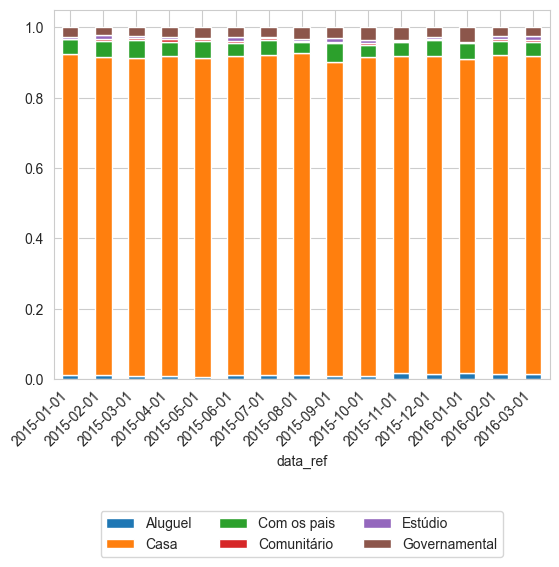

In [23]:
tab_freq = pd.crosstab(renda['data_ref'],renda['tipo_residencia'])
tab = tab_freq.div(tab.sum(axis = 1), axis = 0)

ax = tab.plot.bar(stacked = True)

plt.xticks(rotation=45, ha="right")
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)